# Ejercicio N° 1

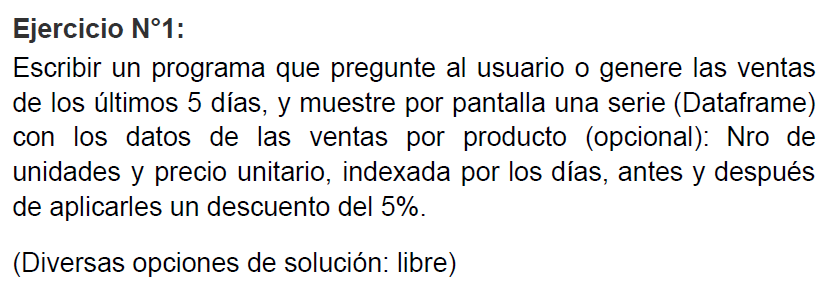

In [27]:
import numpy as np
import pandas as pd

np.random.seed(123)
# tupla de tuplas que almacena el Producto y precio unitario que servira para generar el DataFrame
productoPrecio = (('Manzana',2.5),
                    ('Naranja',2),
                    ('Pera',3),
                    ('Durazno',2),
                    ('Sandía',20),
                    ('Papaya',10),
                    ('Banana',1))

# cantidad de ventas realizadas
cantidadVentas = 30
# generar n números aleatorios que servira para seleccionar productos al azar
random_productos = np.random.randint(1, len(productoPrecio), cantidadVentas)

# almacenar en una lista 30 productos al azar, para luego generar el DataFrame
ventas = []
for x in range(cantidadVentas):
    ventas.append(productoPrecio[random_productos[x]])

# crear el DataFrame etiquetando sus filas y columnas
df1 = pd.DataFrame(
    data=ventas,
    columns=['Producto','Precio_Unitario'],
    index=pd.date_range('2023/01/01',periods=30)
)
# añadir las columnas: Nro_Unidades y precio unitario con descuento
df1 = (
    df1
    .assign(Nro_Unidades = np.random.randint(1,10,30)) # 30 números de entre 1 al 10
    # Precio unitario con descuento del 5 %
    .assign(P_U_con_Descuento = lambda x : x.Precio_Unitario - (x.Precio_Unitario * 0.05))
)
# mostrar las ventas de los ultimos 5 días
print(df1.tail(5))


           Producto  Precio_Unitario  Nro_Unidades  P_U_con_Descuento
2023-01-26   Papaya               10             7               9.50
2023-01-27  Durazno                2             8               1.90
2023-01-28   Papaya               10             2               9.50
2023-01-29  Naranja                2             6               1.90
2023-01-30   Banana                1             8               0.95


# Ejercicio N° 2

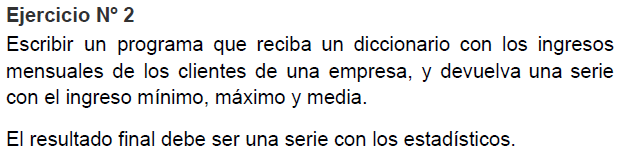

In [28]:
import numpy as np
import pandas as pd

# función que recibe un dic. y devuelve una serie
def min_max_mean(**kwargs):
    # crear una serie con los datos del dic. para aplicar los métodos estadísticos
    s1 = pd.Series(kwargs)
    # crear una serie con los datos estadísticos
    resultado = pd.Series(
        data=[s1.min(),s1.max(),s1.mean().round(2)],
        index=['Minimo','Maximo','Media'] # etiquetar sus filas
    )
    return resultado # returnar la serie

# ingresar el diccionario a la función
s1 = min_max_mean(
    Juan = 2000,
    Pedro = 3000,
    David = 5000,
    Rodrigo = 2500,
    Jose = 5000,
    Franz = 3000,
    Roly = 3000
)
# mostrar la serie con los datos estadisticos
print(s1,type(s1))


Minimo    2000.00
Maximo    5000.00
Media     3357.14
dtype: float64 <class 'pandas.core.series.Series'>


# Ejercicio N° 3

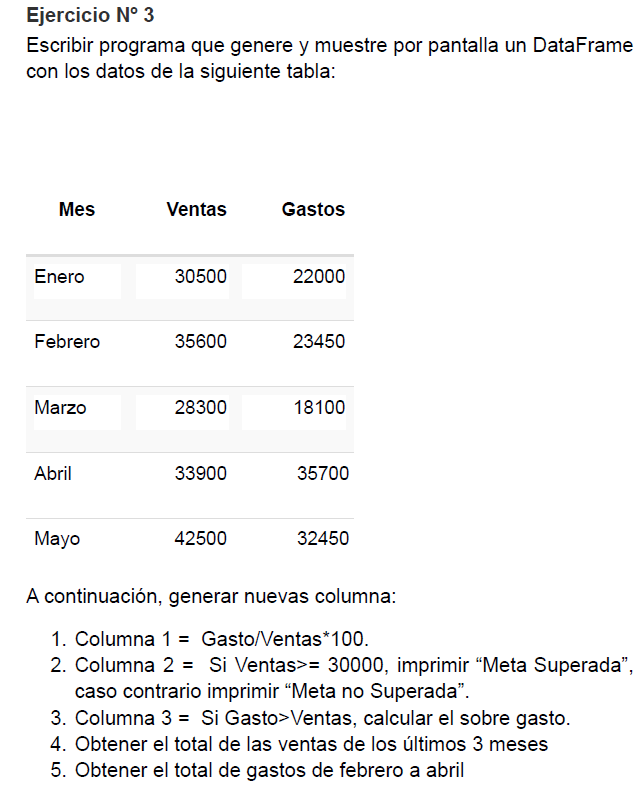

In [29]:
import pandas as pd

# lista de listas con datos de la tabla que se muestra en la imagen
datos = [
    ['Enero', 30500, 22000],
    ['Febrero', 35600, 23450],
    ['Marzo', 28300, 18100],
    ['Abril', 33900, 35700],
    ['Mayo', 42500, 32450]
]
# crear el DataFrame con los datos de la lista
df1 = pd.DataFrame(
    data=datos,
    columns=['Mes', 'Ventas', 'Gastos'] # etiquetar sus columnas
)
# funciones para obtener datos de las nuevas columnas
def columna2(param):
  # función que recibe una serie con datos booleanos 
  # y devuelve una lista de str indicando si se superó la meta o no
    l1 = []
    for i in param:
       # si el elemento X de la serie es verdadero se agrega a la lista: Meta superada
        if i == True:
            l1.append('Meta superda')
        else: # caso contrario: Meta no superada
            l1.append('Meta no superada')
    return l1 # retornamos la lista
def columna3(gasto,venta):
    # función que recibe una serie y devuelve una lista
    l1 = []
    for i in range(len(gasto)): # i=0, hasta la longitud del gasto, con paso 1
        if gasto[i]>venta[i]: # si los gastos superan la venta, indicar el sobre gasto
            l1.append(gasto[i]-venta[i])
        else: # caso contrario nada
            l1.append('')
    return l1 # retornar la lista

# agregar nuevas columnas
df1 = (
    df1
    # añadir columna 1: gastos / ventas *100
    .assign(Columna1=lambda x: x.Gastos / x.Ventas * 100)
    # si la venta es mayor a 30000 escribir Meta superada, caso contrario: Meta no superada
    .assign(Columna2=lambda x: columna2(x.Ventas >= 30000))
    # si el gasto es mayor a la venta, indicar el sobre gasto
    .assign(Columna3=lambda x: columna3(x.Gastos, x.Ventas))
)
# Mostrar DataFrame con las nuevas columnas
print('-'*40)
print('DataFrame con las nuevas columnas')
print(df1)
# suma de las ventas de los ultimos 3 meses
print('-'*40)
print('Total Ventas de los ultimos 3 meses')
# suma de los datos de la fila 2 hasta la ultima fila, de la columna VENTAS
print(df1.loc[2:,['Ventas']].sum())
print('-'*40)
# suma de los gastos de febrero hasta abril
print('Total gastos de Febrero hasta Abril')
# # suma de los datos de la fila 1 hasta 3, de la columna GASTOS
print(df1.loc[1:3,['Gastos']].sum())


----------------------------------------
DataFrame con las nuevas columnas
       Mes  Ventas  Gastos    Columna1          Columna2 Columna3
0    Enero   30500   22000   72.131148      Meta superda         
1  Febrero   35600   23450   65.870787      Meta superda         
2    Marzo   28300   18100   63.957597  Meta no superada         
3    Abril   33900   35700  105.309735      Meta superda     1800
4     Mayo   42500   32450   76.352941      Meta superda         
----------------------------------------
Total Ventas de los ultimos 3 meses
Ventas    104700
dtype: int64
----------------------------------------
Total gastos de Febrero hasta Abril
Gastos    77250
dtype: int64


# Ejercicio N° 4

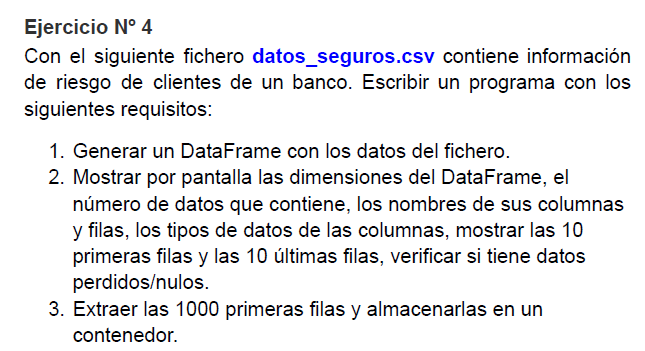

In [ ]:
# cargar los datos
from google.colab import files
files.upload()

## 1. Generar DF con los datos del fichero

In [39]:
df3 = pd.read_csv('datos_seguros.csv',sep=';')
df3.head()

,MES_T0,VENTA_SEGURO,NUM_TC_TOTAL_T2,SALDO_BCO_T2,LINEA_BCO_T2,USO_LINEA_BCO_T2,Nro_CTa_Ahorro_Bco_T1,Ahorro_Sldo_Bco_T1,monto_ope_t2,PROM_ANUAL_MTO_OPERA,MAX_MTO_OPERA_Anual,Ratio_HospvsMtoTotal_t2,SEXO,ANTIGUEDAD_MES,DEPARTAMENTO,SOW_BCO_T2,SOW_BCO_SEMESTRAL
0,201506,0,3.0,0.0,2300.0,0.000000,0.0,0.0,15.00,18.644444,52.80,NaN,M,58,LIMA,0.000000,0.000000
1,201506,0,2.0,3215.0,3500.0,0.918571,0.0,0.0,548.98,2632.020000,5709.24,NaN,M,69,JUNIN,0.816134,0.930867
2,201506,0,1.0,3169.0,5000.0,0.633800,0.0,0.0,0.00,4999.000000,4999.00,0.0,M,16,CALLAO,1.000000,1.000000
3,201506,1,1.0,6495.0,8450.0,0.768639,2.0,505.0,2137.94,4900.191666,11206.80,NaN,F,62,LIMA,0.413831,0.505504
4,201506,0,NaN,NaN,NaN,NaN,0.0,0.0,12.37,12.370000,12.37,NaN,F,5,AREQUIPA,0.000000,0.000000


## 2. Mostrar en pantalla...

In [40]:
# funcion para obtener el tipo de datos de las columnas
def td_columnas(l1): 
  resultado = []
  for valor in l1:
    resultado.append(f'{valor} = {str(df3[valor].dtype)}')
  return resultado


### Dimension de dataFrame

### El número de datos


### Nombre de las columnas


### Nombre de las filas


### Tipo de dato de las columnas

In [41]:
f,c=df3.shape

print(f'''
{'-'*40}
Dimension del DataFrame: {df3.shape}
{'-'*40}
Número de datos: {f*c}
{'-'*40}
Nombre de las columnas: 
{df3.columns.values}
{'-'*40}
Nombre de las filas: 
{df3.index.values}
{'-'*40}
Tipo de datos de las columnas:
{td_columnas(df3.columns.values)}
{'-'*40}

''')


----------------------------------------
Dimension del DataFrame: (45798, 17)
----------------------------------------
Número de datos: 778566
----------------------------------------
Nombre de las columnas: 
['MES_T0' 'VENTA_SEGURO' 'NUM_TC_TOTAL_T2' 'SALDO_BCO_T2' 'LINEA_BCO_T2'
 'USO_LINEA_BCO_T2' 'Nro_CTa_Ahorro_Bco_T1' 'Ahorro_Sldo_Bco_T1'
 'monto_ope_t2' 'PROM_ANUAL_MTO_OPERA' 'MAX_MTO_OPERA_Anual'
 'Ratio_HospvsMtoTotal_t2' 'SEXO' 'ANTIGUEDAD_MES' 'DEPARTAMENTO'
 'SOW_BCO_T2' 'SOW_BCO_SEMESTRAL']
----------------------------------------
Nombre de las filas: 
[    0     1     2 ... 45795 45796 45797]
----------------------------------------
Tipo de datos de las columnas:
['MES_T0 = int64', 'VENTA_SEGURO = int64', 'NUM_TC_TOTAL_T2 = float64', 'SALDO_BCO_T2 = float64', 'LINEA_BCO_T2 = float64', 'USO_LINEA_BCO_T2 = float64', 'Nro_CTa_Ahorro_Bco_T1 = float64', 'Ahorro_Sldo_Bco_T1 = float64', 'monto_ope_t2 = float64', 'PROM_ANUAL_MTO_OPERA = float64', 'MAX_MTO_OPERA_Anual = float64',

### **Mostrar las 10 primeras filas**

In [42]:
df3.head(10)

,MES_T0,VENTA_SEGURO,NUM_TC_TOTAL_T2,SALDO_BCO_T2,LINEA_BCO_T2,USO_LINEA_BCO_T2,Nro_CTa_Ahorro_Bco_T1,Ahorro_Sldo_Bco_T1,monto_ope_t2,PROM_ANUAL_MTO_OPERA,MAX_MTO_OPERA_Anual,Ratio_HospvsMtoTotal_t2,SEXO,ANTIGUEDAD_MES,DEPARTAMENTO,SOW_BCO_T2,SOW_BCO_SEMESTRAL
0,201506,0,3.0,0.0,2300.0,0.000000,0.0,0.0,15.00,18.644444,52.80,NaN,M,58,LIMA,0.000000,0.000000
1,201506,0,2.0,3215.0,3500.0,0.918571,0.0,0.0,548.98,2632.020000,5709.24,NaN,M,69,JUNIN,0.816134,0.930867
2,201506,0,1.0,3169.0,5000.0,0.633800,0.0,0.0,0.00,4999.000000,4999.00,0.0,M,16,CALLAO,1.000000,1.000000
3,201506,1,1.0,6495.0,8450.0,0.768639,2.0,505.0,2137.94,4900.191666,11206.80,NaN,F,62,LIMA,0.413831,0.505504
4,201506,0,NaN,NaN,NaN,NaN,0.0,0.0,12.37,12.370000,12.37,NaN,F,5,AREQUIPA,0.000000,0.000000
5,201506,0,3.0,2373.0,9373.0,0.253174,0.0,0.0,411.86,1410.662727,5055.62,NaN,M,44,CALLAO,0.181633,0.677393
6,201506,0,2.0,0.0,0.0,0.000000,1.0,2662.0,46.00,218.393333,390.90,NaN,M,4,LIMA,0.000000,0.000000
7,201506,0,1.0,3023.0,16720.0,0.180801,0.0,0.0,2982.90,1721.769166,3137.70,0.0,M,136,LIMA,1.000000,1.000000
8,201506,0,1.0,1931.0,12500.0,0.154480,0.0,0.0,412.00,986.337500,2119.00,NaN,M,292,LIMA,0.278603,0.541839
9,201506,0,NaN,NaN,NaN,NaN,2.0,40718.0,1644.30,1581.335000,3565.14,NaN,F,49,AREQUIPA,0.000000,0.000000


### **Mostrar las 10 ultimas filas**



In [43]:
df3.tail(10)

,MES_T0,VENTA_SEGURO,NUM_TC_TOTAL_T2,SALDO_BCO_T2,LINEA_BCO_T2,USO_LINEA_BCO_T2,Nro_CTa_Ahorro_Bco_T1,Ahorro_Sldo_Bco_T1,monto_ope_t2,PROM_ANUAL_MTO_OPERA,MAX_MTO_OPERA_Anual,Ratio_HospvsMtoTotal_t2,SEXO,ANTIGUEDAD_MES,DEPARTAMENTO,SOW_BCO_T2,SOW_BCO_SEMESTRAL
45788,201505,0,4.0,0.0,0.0,0.0,0.0,0.0,1054.41,688.975000,1054.41,NaN,F,105,LIMA,0.0,0.0
45789,201505,0,1.0,0.0,0.0,0.0,2.0,8217.0,0.00,681.600000,1337.00,0.0,M,31,ANCASH,0.0,0.0
45790,201505,0,2.0,0.0,0.0,0.0,0.0,0.0,810.00,810.000000,810.00,NaN,M,226,LIMA,0.0,0.0
45791,201506,0,1.0,0.0,0.0,0.0,2.0,9261.0,4244.19,3466.162500,15419.30,0.0,F,204,UCAYALI,0.0,0.0
45792,201505,0,2.0,0.0,12000.0,0.0,2.0,804.0,277.20,237.600000,277.20,NaN,M,8,LA LIBERTAD,0.0,0.0
45793,201505,0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,F,4,LIMA,0.0,0.0
45794,201505,0,NaN,NaN,NaN,NaN,2.0,6189.0,1314.10,1314.100000,1314.10,NaN,F,76,LA LIBERTAD,0.0,0.0
45795,201506,0,NaN,NaN,NaN,NaN,1.0,138.0,36.00,73.114285,220.00,NaN,F,20,LIMA,0.0,0.0
45796,201506,0,NaN,NaN,NaN,NaN,0.0,0.0,0.00,299.468750,830.00,0.0,M,23,PIURA,0.0,0.0
45797,201506,0,1.0,0.0,0.0,0.0,6.0,2762.0,0.00,780.000000,780.00,0.0,M,125,PASCO,0.0,0.0


### **verificar si tiene datos perdidos/nulos**

In [44]:
datosPerdidos = df3[df3.columns.values].apply(lambda x: x.isnull().sum())  # suma total valores perdidos por columnas
print(datosPerdidos)
print('-'*40)
print(f'Total datos perdidos: {datosPerdidos.sum()}')

MES_T0                         0
VENTA_SEGURO                   0
NUM_TC_TOTAL_T2            20401
SALDO_BCO_T2               20346
LINEA_BCO_T2               20346
USO_LINEA_BCO_T2           20346
Nro_CTa_Ahorro_Bco_T1       1393
Ahorro_Sldo_Bco_T1          1393
monto_ope_t2               12871
PROM_ANUAL_MTO_OPERA       12871
MAX_MTO_OPERA_Anual        12871
Ratio_HospvsMtoTotal_t2    16079
SEXO                           0
ANTIGUEDAD_MES                 0
DEPARTAMENTO                   0
SOW_BCO_T2                     0
SOW_BCO_SEMESTRAL              0
dtype: int64
----------------------------------------
Total datos perdidos: 138917


## Extraer 1000 primeras filas y almacenar en un contentenedor

In [45]:
# del DataFrame obtenemos las 1000 primeras filas 
# y lo almacenamos en un csv con el siguiente nombre
df3.head(1000).to_csv('1000_primeras_filas.csv')